
# Data analysis on No_show_appointment dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This project is going to analyze the No show appointment data set by investigating the patients who showed to their appointment and the patients who did not. The analysis is done by investigating the data set trying to find the reason behind the people who didn’t show up. This project investigates the age, gender, whether the patient has a scholarship or not, the diseases they have, and whether the patient received an SMS or not. 


<a id='intro'></a>
## Proposed questions:

> 1. How does the age of the patient affect his commitment to his/her appointment?
> 2. What is the effect of the gender of the patient on his appointment?
> 3. What is the effect of Hipertension, Diabetes, Alcoholism, Handcap on whether the patients show up or not?
> 4. How does the scholarship affect people showing up?
> 5. How does receiving a message affect the commitment of the patients to their appointments?


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Loading the data and printing few lines

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#using decribe function to take a better look at the data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>by looking at the previous output we see that: 
>>1. handcap column has an input of 4 despite it's a 1 or a 0 column 
>>2. minmum age is -1 which is obviously not right 

In [4]:
#investigating if there are any columns with nan values
pd.isnull(df).any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

>There are no nulls in the data

In [5]:
#using info function to inspect columns data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>by looking at the previous output we see that:
>>1. PatientId is more suitable as int.
>>2. ScheduledDay and AppointmentDay columns should be dates

In [6]:
#searching for duplicates 
sum(df.duplicated())

0

>No duplicates in the data

In [7]:
#inspecting the shape of the data set
df.shape

(110527, 14)

### Data Cleaning 
>1. changing the apropriate data types for the columns 
>2. Fixing the wrong entries

In [8]:
#setting ScheduledDay & AppointmentDay to datetime data type
#setting the data type of PatientId to int 
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [9]:
#setting the data type of PatientId to int 
df = df.astype({"PatientId": int})

In [10]:
#Making sure the changes are done 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int32              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [11]:
#droping the rows with wrong entries in handcap column 
df= df[df['Handcap'] <= 1]

In [12]:
#droping the rows with wrong entries in age column 
df= df[df['Age'] >= 0]

In [13]:
#inspecting the size of the dataset after the changes 
df.shape

(110327, 14)

>200 rows droped

In [14]:
#using describe to see the changes 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,-2.140298e+09,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,1.509849e+08,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,-2.147484e+09,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.147484e+09,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.147484e+09,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-2.147484e+09,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.141274e+09,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#renaming the last column to be easier to work with 
df.rename(columns={'No-show': 'NoShow'}, inplace=True)

In [16]:
#chaning the boolean values to numerical values(0,1) to ease the work
df["NoShow"] = df["NoShow"].str.lower()
df['NoShow'].replace(('yes', 'no'), (1, 0), inplace=True)

In [17]:
#ensuring the changes 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow
0,-2147483648,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,-2147483648,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,-2147483648,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,-2147483648,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,-2147483648,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

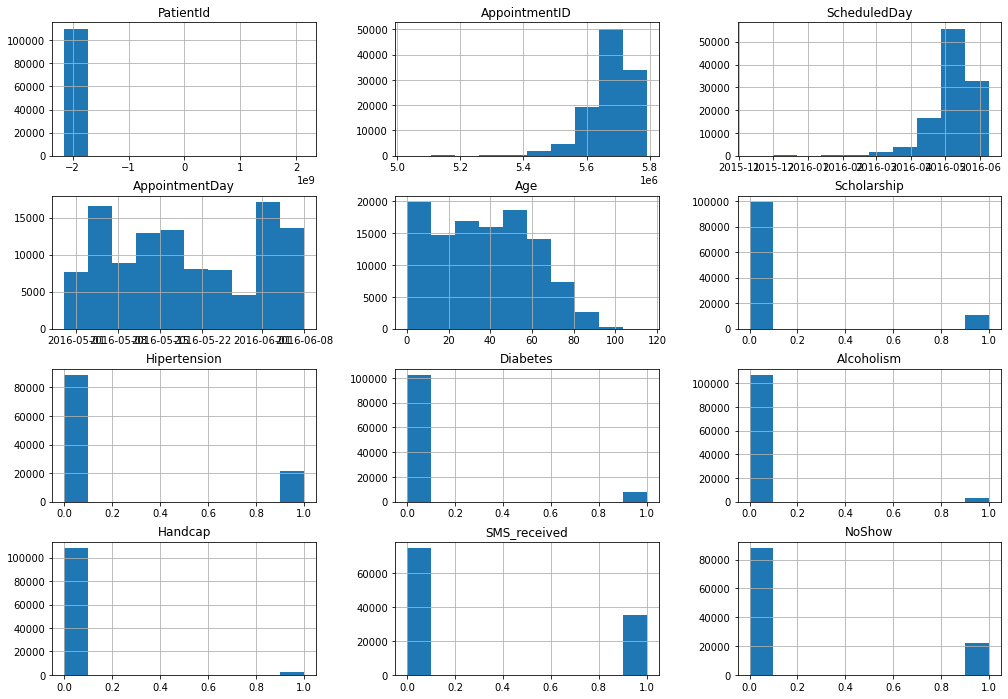

In [18]:
#using histogram to take a better look at the data
df.hist(figsize=(17,12));

### (1) How does the age of the patient affect his commitment to his/her appointment ?

In [19]:
#inspecting the mean age of the patients who showed up 
df.Age[df.NoShow == False ].mean()

37.77709002941544

In [20]:
#inspecting the mean age of the patients who did not show up 
df.Age[df.NoShow == True ].mean()

34.27910943531735

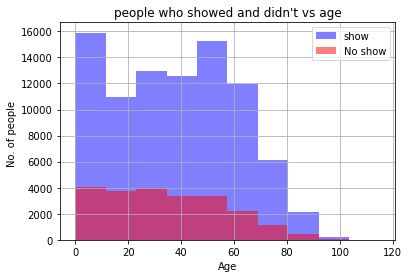

In [21]:
df.Age[df.NoShow == False ].hist(color='blue', label='show', alpha=0.5)
df.Age[df.NoShow == True ].hist(color='red', label='No show', alpha=0.5);
plt.title("people who showed and didn't vs age")
plt.ylabel("No. of people ")
plt.xlabel("Age");
plt.legend();

>Younger people tend to miss thier oppointments compared to older people

### (2) What is the effect of the gender of the patient on his appointment? 

In [22]:
#inspecting the number of females and males 
df.Gender.value_counts()

F    71730
M    38597
Name: Gender, dtype: int64

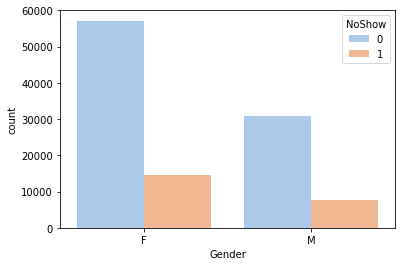

In [23]:
ax = sns.countplot(x="Gender", hue="NoShow", data=df, palette="pastel")

>More females set appointments and show to them than males. However, gender has no significant effect on the commitment 
>of the patient to his appointment. 

### (3) What is the effect of Hipertension, Diabetes, Alcoholism, Handcap on whether the patients show up or not? 

In [24]:
#dividing the data set into two datafrmaes for people who showed and people who did not show
showing = df.loc[df['NoShow'] == 0]
no_showing = df.loc[df['NoShow'] == 1]

In [25]:
#creating a list of the count of the people who showed up in 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap' columns
labels = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
show_count=[]

for label in labels:
  show_count.append(showing[label].sum())


In [26]:
#creating a list of the count of the people who did not show up in 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap' columns
noshow_count=[]

for label in labels:
  noshow_count.append(no_showing[label].sum())

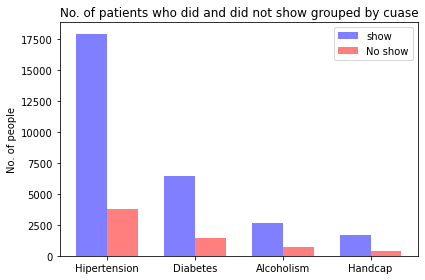

In [27]:
x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, show_count, width, label='show', color='blue', alpha=0.5 )
rects2 = ax.bar(x + width/2, noshow_count, width, label='No show', color='red',  alpha=0.5)

ax.set_ylabel('No. of people')
ax.set_title('No. of patients who did and did not show grouped by cuase')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

>Hipertension has the highest number of people who did show up.

### (4) How does the scholarship affect people showing up? 

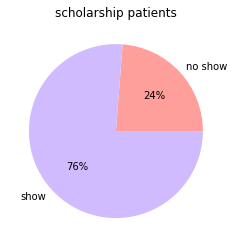

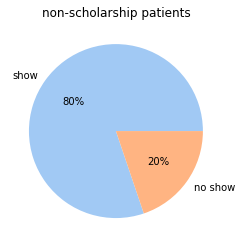

In [28]:
data = [(no_showing.Scholarship == 1).sum(), (showing.Scholarship == 1).sum()]
labels = ['no show', 'show']

colors = sns.color_palette('pastel')[3:5]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('scholarship patients')


plt.show()


data = [(showing.Scholarship == 0).sum(), (no_showing.Scholarship == 0).sum()]
labels = ['show', 'no show']

colors = sns.color_palette('pastel')[0:3]

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('non-scholarship patients')
plt.show()

> Patients with no scholarships tend to miss thier appointments more than people with no scholarship.
>Patients with no scholarships are more commited to thier appointments

### (5) How does receiving a message affect the commitment of the patients to their appointments?

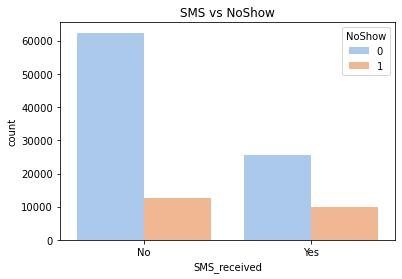

In [29]:
ax = sns.countplot(x="SMS_received", hue="NoShow", data=df, palette="pastel")
labels=['No', 'Yes']
ax.set_xticklabels(labels, fontsize=10)
ax.set_title("SMS vs NoShow");

>In patients who recieved a message, people showed up more than those who didn't. 
>In patients who did not recieve a message, people showed up more than those who didn't. 

<a id='conclusions'></a>
## Conclusions
>In conclusion and after reviewing the graphs, the following points can be concluded 
> 1. people of younger age are less committed to their appointments.
> 2. Diabetes, Alcoholism, Handcap has no significant effect on people not to show up. 
> 3. Hipertension has the highest no. of patients compared to other causes but it does not affect the commitment of the patient.
> 4. since 80% of the people with no scholarship showed for their appointments, they are more committed. However, 76% of the people with no scholarship also showed up so having a scholarship or not does not affect the commitment.
> 5. more female patients go to their appointment. however, gender has no significant effect on people showing up.
> 6. Receiving  a message or not does not affect people showing up to their appointments.


<a id='conclusions'></a>
## Limitation 
>1. the data provided was not enough to draw a solid conclusion why patients do not show up for their appointment
>2. The data include wrong entries like in the age and handicap columns 



<a id='conclusions'></a>
## Resources
>https://matplotlib.org/stable/gallery/index.html
 
>https://seaborn.pydata.org/examples/index.html

>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
